# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:Roman 6661
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd      
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [3]:
titanic_train_data=pd.read_csv('titanic_train.csv')   #load the train into titanic_train_data
titanic_test_data=pd.read_csv('titanic_test.csv')     #Load the test into titanic_test_data
print(titanic_train_data.info())   #info function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB
None


In [4]:
titanic_train_data.describe()   #describe function

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [5]:
display(titanic_train_data.isnull().sum())    #check for missing infomation
print("No missing values in train set")

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

No missing values in train set


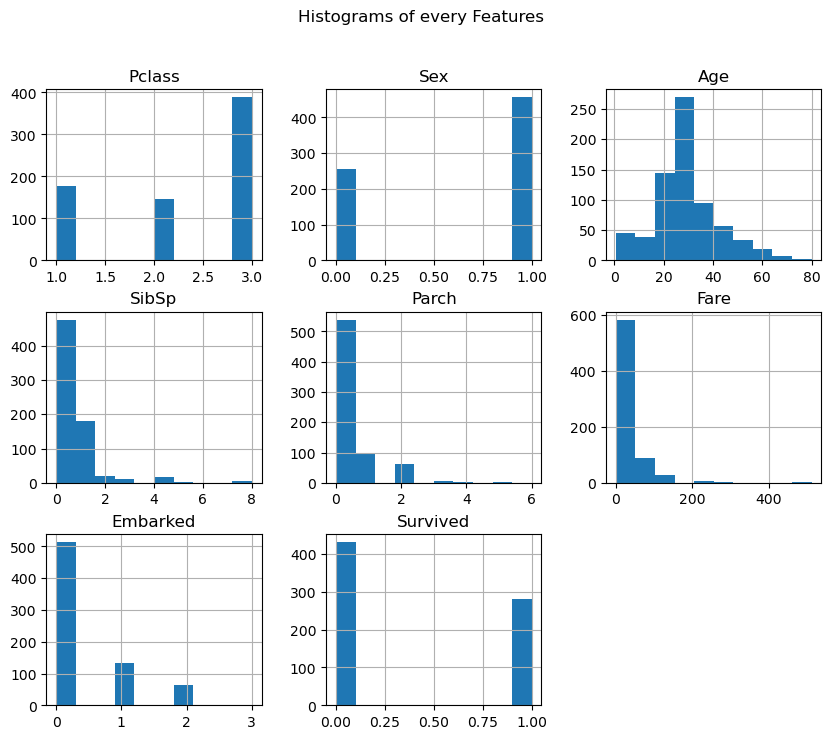

In [6]:
titanic_train_data.hist(figsize=(10, 8))               #Histogram of all coulmes
plt.suptitle('Histograms of every Features')
plt.show()

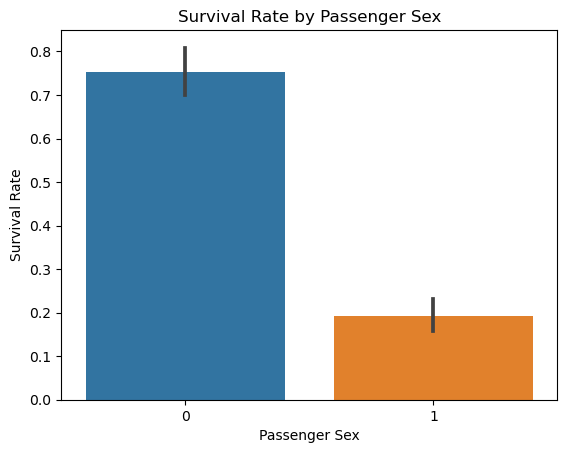

In [7]:

sns.barplot(x='Sex', y='Survived', data=titanic_train_data)   #The graph shows the likelihood of survival depending on gender.
                                                              #when 0=woman and 1=men
plt.title('Survival Rate by Passenger Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Sex')
plt.show()

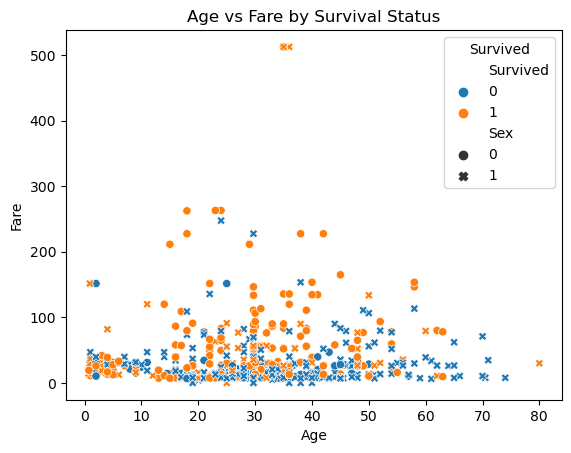

In [8]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_train_data)    #In the scatterplot, the graph displays the relationship between passengers' age and ticket fare, highlighting the differences between those who survived and those who did not.
plt.title('Age vs Fare by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

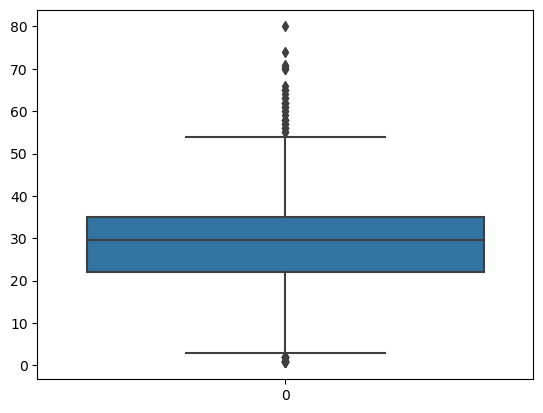

In [9]:
sns.boxplot(titanic_train_data.Age)       #The box plot provides a clear view of the distribution of passenger ages in the Titanic dataset, showing the central tendency, spread, and any potential outliers in age.
plt.show() 

In [10]:
# remove outliers by column name
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [11]:
df_withoutOutlier_train = remove_outlier(titanic_train_data, "Age")   #updated df without (age) outliers
print(df_withoutOutlier_train.count())

Pclass      658
Sex         658
Age         658
SibSp       658
Parch       658
Fare        658
Embarked    658
Survived    658
dtype: int64


In [12]:
df_withoutOutlier_train.mean()   #mean function on the df without (age)outliers

Pclass       2.323708
Sex          0.635258
Age         28.779595
SibSp        0.506079
Parch        0.361702
Fare        31.877399
Embarked     0.369301
Survived     0.393617
dtype: float64

In [13]:
df_withoutOutlier_train.describe()   #describe function 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,2.323708,0.635258,28.779595,0.506079,0.361702,31.877399,0.369301,0.393617
std,0.833151,0.481724,10.313166,1.028125,0.803261,50.638950,0.644919,0.488923
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.427100,0.000000,0.000000
75%,3.000000,1.000000,34.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,3.000000,1.000000,54.000000,8.000000,6.000000,512.329200,2.000000,1.000000


In [14]:
x_train=df_withoutOutlier_train.drop(columns=['Survived'])    #x_train (form the train set) will have all the columns without survived which is the target  
y_train=df_withoutOutlier_train['Survived']                   #y_train (form the train set) will have only the target column which is survived

x_test=titanic_test_data.drop(columns=['Survived'])           #x_test (form the test set) will have all the columns without survived which is the target  
y_test=titanic_test_data['Survived']                          #y_test (form the test set) will have only the target column which is survived

## Part 3 - Experiments
You could add as many code cells as needed

In [15]:
model =DecisionTreeClassifier()   #the model is DecisionTree 
model.fit(x_train,y_train)        #train the model on the train set 
predictions=model.predict(x_test) #predict on the test set 
predictions                       #show to predictions

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [16]:
score=accuracy_score(y_test,predictions)   #The score is a measure that evaluates how well the model's predictions match the actual results from the test data
print(f"Test set accuracy: {score:.4f}")


Test set accuracy: 0.8380


In [17]:
param_grid_dt = {                       #defining the hyperparameter ranges for the Decision Tree model
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#creating a function to perform Grid Search and calculate metrics
def run_grid_search_and_evaluation(x_train, y_train, x_test, y_test, model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_model.fit(x_train, y_train)
    
    y_pred = best_model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'Best Parameters': grid_search.best_params_,
        'Best CV Accuracy': grid_search.best_score_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results = []   #creating an array for the results


models = [    #creating the model
    ('Decision Tree', DecisionTreeClassifier(), param_grid_dt)
]

#calculting based on the grid search
for name, model, param_grid in models:
    result = run_grid_search_and_evaluation(x_train, y_train, x_test, y_test, model, param_grid)
    results.append(result)

# loop through the results and print them in a formatted way
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Best Cross-Validation Accuracy: {result['Best CV Accuracy']:.4f}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1 Score: {result['F1 Score']:.4f}")
    print("-" * 40)  

Model: DecisionTreeClassifier
Best Parameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.7918
Accuracy: 0.8492
Precision: 0.7833
Recall: 0.7705
F1 Score: 0.7769
----------------------------------------


In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)  #defining a KNN model with 5 nearest neighbors
knn_model.fit(x_train, y_train)  
y_pred = knn_model.predict(x_test)  # prediction of the responses on the test set
accuracy = accuracy_score(y_test, y_pred)  #measuring the accuracy of the model
print("Accuracy of KNN model:", accuracy) #print the result

Accuracy of KNN model: 0.6927374301675978


In [19]:
param_grid_knn = {                     #defining the hyperparameter ranges for the knn model
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

results = []   #creating an array for the results

models = [    #creating the model
    ('KNN', KNeighborsClassifier(), param_grid_knn)]

for name, model, param_grid in models:
    result = run_grid_search_and_evaluation(x_train, y_train, x_test, y_test, model, param_grid)
    results.append(result)
    
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Best Cross-Validation Accuracy: {result['Best CV Accuracy']:.4f}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1 Score: {result['F1 Score']:.4f}")
    print("-" * 40) 

Model: KNeighborsClassifier
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.7266
Accuracy: 0.6983
Precision: 0.5593
Recall: 0.5410
F1 Score: 0.5500
----------------------------------------


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [20]:
best_model = Pipeline([                 
    ('preprocessor', ColumnTransformer(
        transformers=[

        ],
        remainder='passthrough'
    )),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_split=10, min_samples_leaf=4))  # best hyperparameters based on param_grid_dt
])

best_model.fit(x_train, y_train)  # training the model again 
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# print evaluation metrics
print("Evaluation Metrics for the Best Decision Tree Model:\n")
print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Precision on test set: {precision:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 Score on test set: {f1:.4f}")

Evaluation Metrics for the Best Decision Tree Model:

Accuracy on test set: 0.8492
Precision on test set: 0.7833
Recall on test set: 0.7705
F1 Score on test set: 0.7769


In [21]:
# define the best KNN model pipeline
best_model_knn = Pipeline([   
    ('preprocessor', ColumnTransformer(
        transformers=[
             ('num', SimpleImputer(strategy='mean'), ['Age', 'Fare']),
            ('cat', SimpleImputer(strategy='most_frequent'), ['Sex']),
        ],
        remainder='passthrough'  # Keep the rest of the columns as is
    )),
    ('classifier', KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan'))
])

# train the model
best_model_knn.fit(x_train, y_train)

# predict and evaluate the model on the test set
y_pred_knn = best_model_knn.predict(x_test)

# calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# print the evaluation metrics
print("Evaluation Metrics for the Best KNN Model:\n")
print(f"Accuracy on test set: {accuracy_knn}")
print(f"Precision on test set: {precision_knn}")
print(f"Recall on test set: {recall_knn}")
print(f"F1 Score on test set: {f1_knn}")

Evaluation Metrics for the Best KNN Model:

Accuracy on test set: 0.6983240223463687
Precision on test set: 0.559322033898305
Recall on test set: 0.5409836065573771
F1 Score on test set: 0.55


## Part 5 - Apply on test and show model performance estimation

In [22]:
# Transform the test set using the preprocessor
X_test_processed = best_model.named_steps['preprocessor'].transform(x_test)

# Predict on the processed test set
y_pred_test = best_model.predict(X_test_processed) 

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Create a DataFrame to compare actual results and predicted results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print('More examples:')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\n')

# Print the first 5 rows comparing predicted values to actual values
print("Predictions vs. Actuals on Test Set:")
print(results_df.head(5))

More examples:
Precision: 0.7833
Recall: 0.7705
F1 Score: 0.7769


Predictions vs. Actuals on Test Set:
   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       1          1
